
---

# Data analysis of Airbnb London
Airbnb is an online e-commerce marketplace founded in August 2008 that offers lodging, homestays, hostel beds, hotel rooms and vacation and apartment rentals. Its big differential is the inovation behind its operation. The company doesnt own any of the listed properties. In fact, the company acts as a broker between the consumers ( in this case the people willing to get a place to stay ) and the producers ( the owners of the properties ).

As a modern company seeking for inovation, the data of some cities can be found in the [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**In this notebook we are going to analyse the data of Airbnb London. We hope to get some insights and understand how the company is present and its dynamics in one of the biggest cities in the world.**

## Setup

All data used in this notebook were achieved at [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

To start, we are going to use the listings.csv.

* `listings.csv` - *Summary information and metrics for listings in London.*


In [12]:
# Import needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
# import file
df = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2020-05-10/visualisations/listings.csv")

## Análise dos Dados

This stage purpose is to understand how the data is organized.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,21,2020-02-22,0.18,3,361
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,10,89,2020-03-16,0.70,1,256
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,300,3,42,2019-11-02,0.38,15,330
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,360
4,25023,All-comforts 2-bed flat near Wimbledon tennis,102813,Amanda,NaN,Wandsworth,51.44687,-0.21874,Entire home/apt,65,21,35,2020-03-30,0.69,1,42


### checking the size of the dataset.

In [5]:
df.shape

(85207, 16)

* with the above output we can observe that we have 85207 examples and, as previously said, 16 columns ( attributes ) in each example. This dataset is one of the largest in the Airbnb as London is one of the biggest cities in the world in terms of turism and business.
* Nowadays london has approximately 9 million inhabitants.
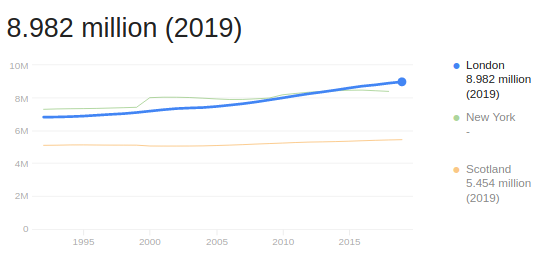
<br>

## Missing Data

In this section we are going to check for missing data

In [8]:
# Printing the total amount of missin data
print(df.isnull().sum())

id                                    0
name                                 24
host_id                               0
host_name                            28
neighbourhood_group               85207
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       21438
reviews_per_month                 21438
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [14]:
# Printing the relative amount of missing data
print(np.round(df.isnull().sum()/df.shape[0] * 100,2).sort_values(ascending = False))

neighbourhood_group               100.00
reviews_per_month                  25.16
last_review                        25.16
host_name                           0.03
name                                0.03
availability_365                    0.00
calculated_host_listings_count      0.00
number_of_reviews                   0.00
minimum_nights                      0.00
price                               0.00
room_type                           0.00
longitude                           0.00
latitude                            0.00
neighbourhood                       0.00
host_id                             0.00
id                                  0.00
dtype: float64


* With this we can conclude that the neighbourhood_group attribute is not available in any of the rows. With that said we can drop it since it wont be useful.

* With respect to last_review and review_months, these attributes have nearly 25% of their data missing.

* As to the name and host_name, these attributes have less than 0.03% of missing data


In [60]:
# dropping the neighbourhood_group
df = df.drop(columns = 'neighbourhood_group')

## Duplicated data

As a normal step in any investigation, we must check for duplicated data.

In [20]:
df.duplicated().sum()

0

With that seen, we can conclude the dataset dont have any duplicated row. Although, we can keep examining this problem and get some insights.

In [24]:
df['id'].duplicated().sum()

0

As expected, there is no duplicated id. Although, we can see below that there are 31444 duplicated host_id, which suggests that there are owners with more than 1 property in airbnb.

In [25]:
df['host_id'].duplicated().sum()

31444

In [73]:
# outputting the owners with the largest number of aparissons in airbnb
host_id = df['host_id'] 
host_id.value_counts().head(20)

33889201     910
137094377    284
13557337     248
28820321     246
48165024     233
1432477      185
27572615     165
224866971    131
50291093     117
988379       104
10961046     102
81617302      89
111291126     89
176910904     88
36126550      87
83740964      87
2331446       83
58828772      82
44679311      80
228928499     80
Name: host_id, dtype: int64

Now that we saw that lost of owners have more than one advertisement in airbnb, lets check if those are really individual or duplicated announces.

In [39]:
largest_advertiser = df.loc[df["host_id"] == 33889201]
largest_advertiser

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7969,6654036,"Lovely 2BR, In the Heart of Westminster, by Veeve",33889201,Unique,NaN,Westminster,51.49301,-0.13884,Entire home/apt,215,4,9,2017-10-07,0.19,910,0
8007,6683135,"Modern Thameside 2BR, Chelsea Bridge, by Veeve",33889201,Unique,NaN,Wandsworth,51.48315,-0.14844,Entire home/apt,516,3,6,2019-12-07,0.11,910,361
10548,8206251,"Up to 20% off! Open-plan 2 bed, Islington",33889201,Unique,NaN,Islington,51.53930,-0.10345,Entire home/apt,438,2,2,2017-03-19,0.04,910,0
10886,8449051,"Bright & spacious 4 BR, near the river, by Veeve",33889201,Unique,NaN,Hammersmith and Fulham,51.47161,-0.19436,Entire home/apt,714,2,4,2017-08-29,0.09,910,361
10887,8449280,"2 BR, amazing location in Central London, by V...",33889201,Unique,NaN,Camden,51.51959,-0.11887,Entire home/apt,398,3,3,2019-09-24,0.14,910,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83231,42869652,"Chic, Bright Battersea 5BR with Terrace (Veeve)",33889201,Unique,NaN,Wandsworth,51.47051,-0.15087,Entire home/apt,659,1,0,NaN,NaN,910,32
83304,42885543,Bright Battersea 2BR with Double-Height (Veeve),33889201,Unique,NaN,Wandsworth,51.46961,-0.14781,Entire home/apt,402,3,0,NaN,NaN,910,0
83502,42920159,Colourful & Charming 4BR in Battersea (Veeve),33889201,Unique,NaN,Wandsworth,51.47065,-0.17148,Entire home/apt,453,1,0,NaN,NaN,910,361
83534,42923925,Riverside Mansions,33889201,Unique,NaN,Wandsworth,51.46614,-0.21785,Entire home/apt,388,3,0,NaN,NaN,910,361


In [40]:
largest_advertiser['name'].value_counts()

Pared-Back Elegance                                   2
Lovely English cottage in quiet street with garden    1
Fabulous 4 BR House in Kensington, by Veeve           1
Indulgent 4 BR home close to main tube, Veeve         1
Brick-wall rooms in artistic flat close to centre     1
                                                     ..
Modern 2BR in exclusive Mayfair, by Veeve             1
Characterful 1 bedroom apt. in Camden                 1
Chic 3BR with garden in Shepherd's Bush (Veeve)       1
Up to 20% off! Fabulously 1 bed apt, Fiztrovia        1
Well located 2 BR close to the train, by Veeve        1
Name: name, Length: 909, dtype: int64

As shown above, it can be concluded that indeed, there is only one repeated annoucement, as show bellow.

In [41]:
largest_advertiser.loc[largest_advertiser['name'] == 'Pared-Back Elegance']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
77924,41341066,Pared-Back Elegance,33889201,Unique,NaN,Islington,51.57081,-0.11999,Entire home/apt,749,1,0,NaN,NaN,910,361
82629,42727445,Pared-Back Elegance,33889201,Unique,NaN,Islington,51.56959,-0.12071,Entire home/apt,759,3,0,NaN,NaN,910,361


* This section was useful to keep in mind that many of the advertisements are concentrated in the hands of few people.

### Extra map analysis
* Just as a matter of curiosity, lets plot the distribution of these announces in a map, to see how concentrated they are.

In [48]:
import mplleaflet # library used to plot our map

In [57]:
# plotar os imóveis pela latitude-longitude
plt.plot(largest_advertiser['longitude'], largest_advertiser['latitude'], '^', color = 'purple')
mplleaflet.show()

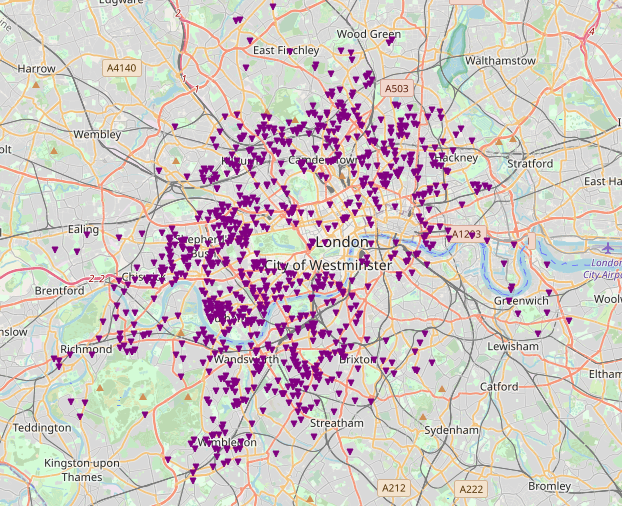

* As can be seen above, the triangles that represent the announces are well distributed throught the city

## Variables distribution
Here we are going to identify the variables distribution

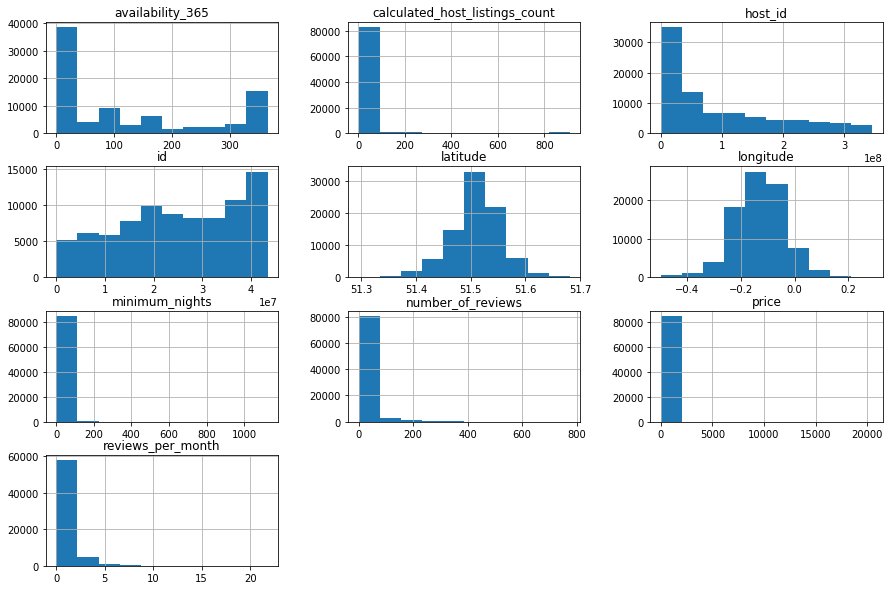

In [62]:
# plotting the variables histogram
df.hist(bins=10, figsize=(15,10));

## Outliers

With the histograms plotted, its reasonable to thinks that outliers may exist in the attributes that got a distorted graphic, like `price`, `minimum_nights` e `calculated_host_listings_count`.

There are two basic ways to check for outliers:

* An statistical resume that can be obtained by `describe()` method
* Plotting the variable boxplot.

### Describe method

In [63]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,85207.000000,85207.000000,85207.000000,63769.000000,85207.000000,85207.000000
mean,128.951800,4.593437,17.284179,0.877056,20.224477,122.478975
std,306.939736,19.667718,37.170766,1.090839,98.070548,139.290122
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,46.000000,1.000000,0.000000,0.180000,1.000000,0.000000
50%,81.000000,2.000000,4.000000,0.500000,1.000000,74.000000
75%,140.000000,3.000000,17.000000,1.150000,5.000000,251.000000
max,20471.000000,1125.000000,775.000000,21.810000,910.000000,365.000000


observing the results, we can conclude that:
* the `price` and `minimum_nights` are attributes that have the largest outliers.
* `number_of_reviews` and `reviews_per_month` are variables that may vary according to the client. As so, it is plausible that this variation is possible.
* `Availability_365` is inside the maximum range of 365.
* `calculated_host_listing` just confirm what we previously saw in the duplicated data section.

### Boxplot
Here we are investigating the `price` and `minimum_nights` columns

#### Minimum_nights boxplot

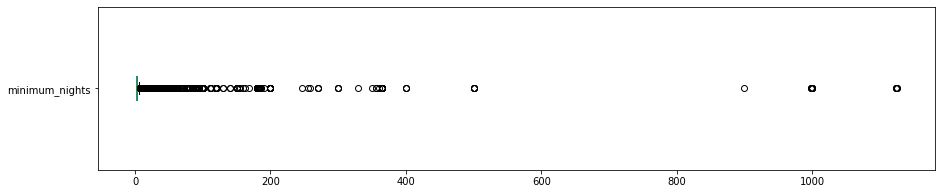

minimum_nights values above 30:
1039 Inputs
1.2194%


In [76]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("minimum_nights values above 30:")
print("{} Inputs".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

* We can conclude that, indeed, the boxplot shows how the data is concentrated near the 5 days area, while there are variables varying till more than 1000 days.

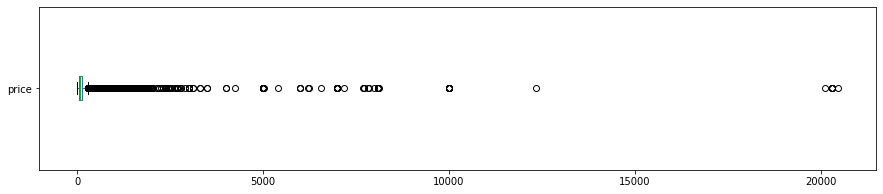


price: values above 500
2041 inputs
2.3953%


In [89]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()


print("\nprice: values above 500")
print("{} inputs".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

### Histogram without outliers

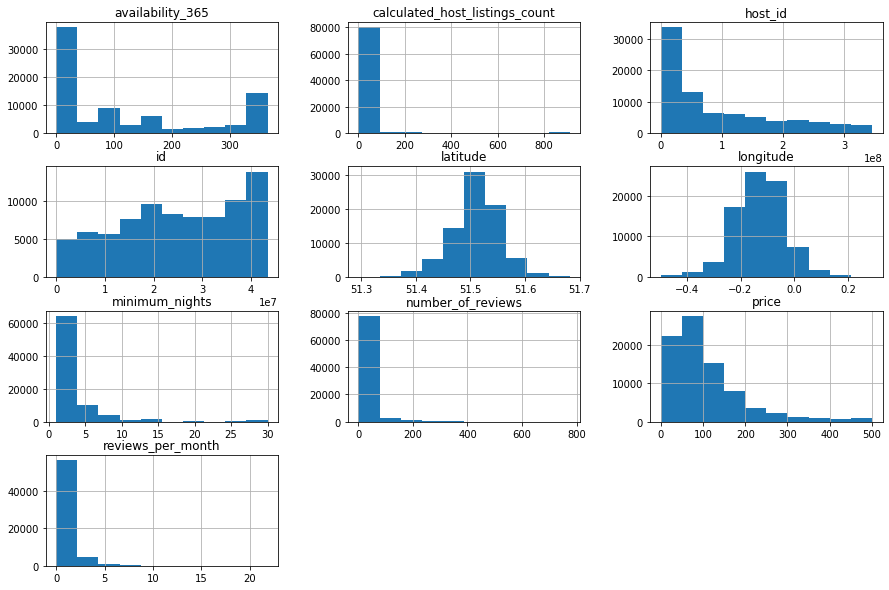

In [91]:
# remove the outliers in these 2 variables inside the dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotting
df_clean.hist(bins=10, figsize=(15,10));

## Correlation

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.